# Insurance Cost Analysis


## Overview of the dataset:
###### The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region. This dataset can be used to train a machine learning model that can predict medical expenses for new customers.
###### To provide insights into the key factors that contribute to higher insurance costs and help the company make more informed decisions regarding pricing and risk assessment.
###### The dataset contains 2.7K rows and 7 columns

## Objectives:
###### 1. Load the data as a pandas dataframe
###### 2. Clean the data, taking care of the blank entries (Data Wrangling) 
###### 3. Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
###### 4. Develop single variable and multi variable Linear Regression models for predicting the charges
###### 5. Use Ridge regression to refine the performance of Linear regression models.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [3]:
# Display first 10 rows of the dataset to enure it has input properly

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv", header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [4]:
# Add Headers

headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [5]:
df1=df.replace('?',np.nan, inplace = True)
print(df)

     age  gender     bmi  no_of_children smoker  region      charges
0     19       1  27.900               0      1       3  16884.92400
1     18       2  33.770               1      0       4   1725.55230
2     28       2  33.000               3      0       4   4449.46200
3     33       2  22.705               0      0       1  21984.47061
4     32       2  28.880               0      0       1   3866.85520
...   ..     ...     ...             ...    ...     ...          ...
2767  47       1  45.320               1      0       4   8569.86180
2768  21       1  34.600               0      0       3   2020.17700
2769  19       2  26.030               1      1       1  16450.89470
2770  23       2  18.715               0      0       1  21595.38229
2771  54       2  31.600               0      0       3   9850.43200

[2772 rows x 7 columns]


### Data Wrangling

In [ ]:
# Identify any columns Null (or NaN, or missing) information 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [ ]:
# Handle missing data accordingly:
# For continuous attributes replace missing values with the mean (aka age).
# For categorical attributes replace missing values with the most frequent value (aka smoker).
# Adjust the 'Charges' column values to display as 2 decimals points 

In [7]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

df[["age","smoker"]] = df [["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [19]:
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.9
1,18,2,33.770,1,0,4,1725.6
2,28,2,33.000,3,0,4,4449.5
3,33,2,22.705,0,0,1,21984.5
4,32,2,28.880,0,0,1,3866.9


### Exploratory Data Analysis (EDA)

(0.0, 66902.825)

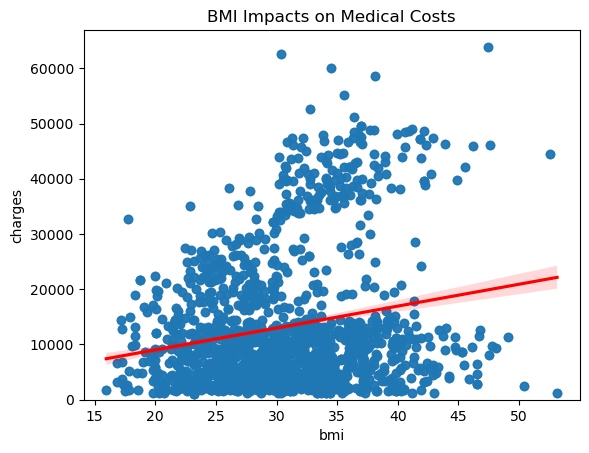

In [77]:
# Implement the regression plot for 'charges' with respect to 'bmi'
# This regression plot shows us how a patients bmi affects the medical charges. 
# The plot implys bmi between 20-35 are the common factors and the avergae for medical costs. However, bmi does not seem to be the only impact.  

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.title('BMI Impacts on Medical Costs')
plt.ylim(0,)

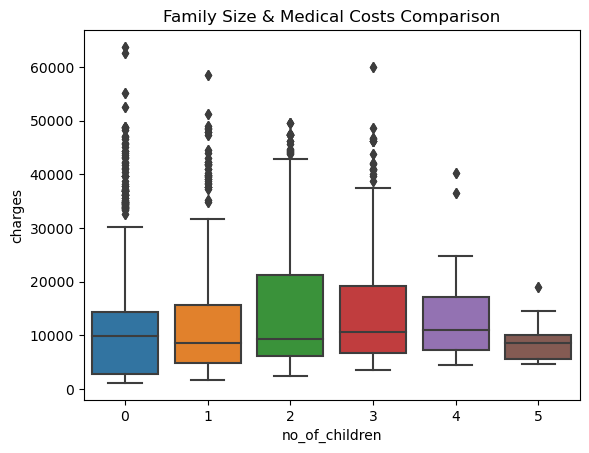

In [79]:
# Implement the box plot for 'charges' with respect to 'number of children'

sns.boxplot(data=df, x="no_of_children", y="charges")
plt.title('Family Size & Medical Costs Comparison')
plt.show()

In [60]:
# Print the correlation matrix for the dataset

print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054057  
charges         0.054057  1.000000  


### Model Development 

In [12]:
# Fit a linear regression model that may be used to predict the 'charges' value, just by using the 'smoker' attribute of the dataset. Print R^2 score of this model.

X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.6221791733924185


In [13]:
# Fit a linear regression model that may be used to predict 'charges' value, just by using all other attributes of the dataset. Print R^2 score of this model.
# We will see a improvement in the performance. 

# definition of Y and lm remain same as used in last cell. 

Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [14]:
# Training Pipeline that uses 'StandardScaler()', 'PolynomialFeatures()' and 'LinearRegression()' to create a model that can predict the 'charges' value using all other attributes of the dataset. 
# There should be further improvements in the performance. 

# Y and Z use the same values as defined in previous cells
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8452185526187208


### Model Refinement 

In [15]:
# Split the data into training / testing subsets, reserving 20% for testing. 
# Z and Y hold same values as in previous cells

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [16]:
#Initalize the Ridge Regressor that userd hyperparameter a=0.1. Fit model using training subset. 
#Print the R^2 score for testing data. 

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6760807731582402


In [17]:
#Apply Polynomial transformation to the training parameters with degree=2.
#Use transformed feature set to fit the same regression model, as above, using the training subset
#Print the R^2 score for the testing subset. 

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
r2_score(y_test, y_hat)

0.7835631107608143